# Name: Prathipati Rajendra Sukumar.


### Data Analysis of a Super Store


This is the Exploratory Data Analysis of a superstore as part of the task completion of GRIP Internship organised by the Sparks Foundation. The objective of this task is to find out the weak areas where the superstore can work more to increase their profits and to give an insight of what problems can arise in their business by exploring the data.


Let us import all the necessary libraries using their common aliasing and set some of the default styles for the plots

# Data-analysis-of-a-super-store

Use the "Run" button to execute the code.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


# Data Preparation and Cleaning


The very first thing to do is to read the csv file into a pandas dataframe and then filter out the unwanted columns from the data.After this, we can proceed with querying and answering, then visulaising using different plots.

In [2]:
raw_df=pd.read_csv('SampleSuperstore.csv')

In [3]:
raw_df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [77]:
raw_df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

#### Let us remove all the unwanted columns from the dataframe.

In [5]:
raw_df.drop(['Postal Code'], inplace=True, axis=1)

#### Let’s have a look at data dimensionality using .shape method

In [6]:
raw_df.shape

(9994, 12)

#### We can use the info() method to output some general information about the dataframe:

In [7]:
raw_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


#### The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25, 0.50, and 0.75 quartiles.

In [8]:
raw_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [79]:
raw_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit %'],
      dtype='object')

In [4]:
raw_df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [81]:
raw_df['Profit %']=raw_df['Profit']/raw_df['Sales']*100

# Exploring and Visualizing the Data

# 1) STATE WISE DISTRIBUTION OF SALES AND PROFIT
Let us firstly make a group of states and by adding the total number of sales gets the required data.

In [9]:
State_wise_sales=raw_df.groupby('State')['Sales'].sum()

In [10]:
State_wise_sales

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

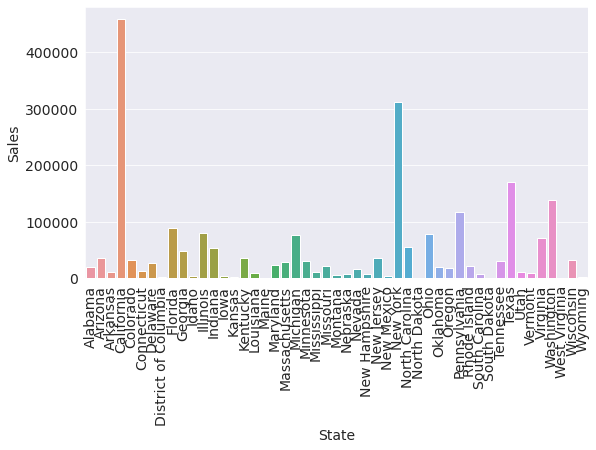

In [11]:
sns.barplot(x=State_wise_sales.index,y=State_wise_sales);
plt.xticks(rotation=90);

From the above bar plot,It is clearly visible that CALIFORNIA is producing greater number of sales and next highest sales producing state is NEW YORK.

In [12]:
state_df= raw_df.groupby('State')[['Sales','Profit']].sum()

In [13]:
state_df['profit %']=state_df['Profit']*100/state_df['Sales']

In [14]:
state_df

,Sales,Profit,profit %
State,,,
Alabama,19510.6400,5786.8253,29.659844
Arizona,35282.0010,-3427.9246,-9.715789
Arkansas,11678.1300,4008.6871,34.326447
California,457687.6315,76381.3871,16.688541
Colorado,32108.1180,-6527.8579,-20.330864
Connecticut,13384.3570,3511.4918,26.235790
Delaware,27451.0690,9977.3748,36.346034
District of Columbia,2865.0200,1059.5893,36.983662
Florida,89473.7080,-3399.3017,-3.799219


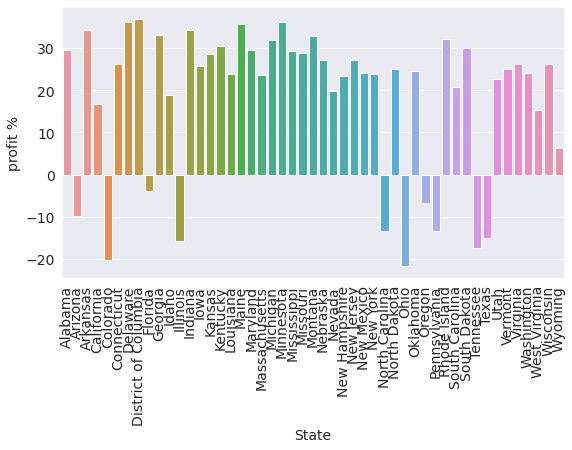

In [36]:

sns.barplot(x=state_df.index,y=state_df['profit %'])
plt.xticks(rotation=90);

There are some states which are producing losses that can be observed from the above bar plot and increasing discount,decreasing the sales price may lead to decrease some amount of loss.

# 2) REGION WISE DISTRIBUTION OF SALES AND PROFIT


In [40]:
region_df= raw_df.groupby('Region')[['Sales','Profit']].sum()

In [41]:
region_df

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


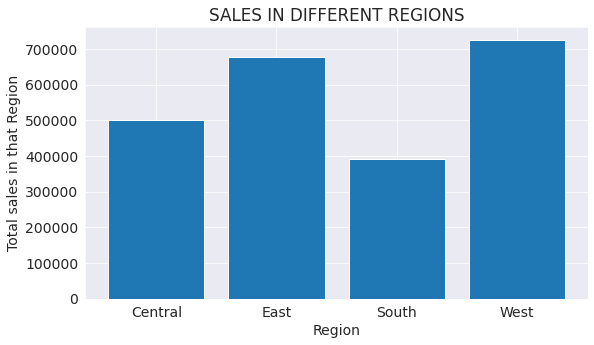

In [43]:
plt.xlabel('Region')
plt.ylabel('Total sales in that Region')
plt.title('SALES IN DIFFERENT REGIONS')
plt.bar(region_df.index, region_df.Sales);

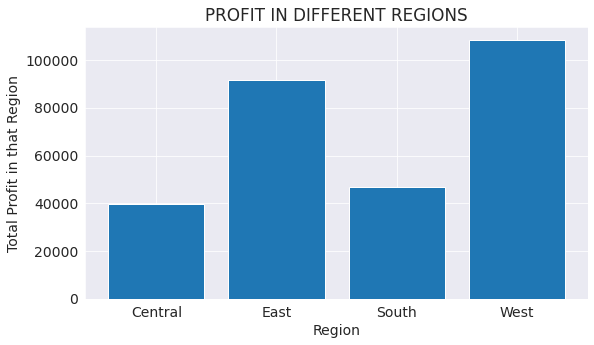

In [44]:
plt.xlabel('Region')
plt.ylabel('Total Profit in that Region')
plt.title('PROFIT IN DIFFERENT REGIONS')
plt.bar(region_df.index, region_df.Profit);

As per the above pie chart,it is clearly said that WEST region is producing greater number of sales.Sales and Profits are directly proportional in East and West regions,while sales in central region are greater than sales in south region but while coming in to its profit distribution,south region is producing greater profit than central region. There is a need of marketing or an improvement in shipment process for the south and central regions

# 3)  CATEGORY WISE DISTRIBUTION OF SALES AND PROFIT

In [19]:
raw_df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [22]:
Sales_in_category_wise=raw_df.groupby('Category')['Sales'].sum()

In [28]:
Sales_in_category_wise

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [22]:
category_df= raw_df.groupby('Category')[['Sales','Profit']].sum()

In [23]:
category_df['profit %']=category_df['Profit']*100/category_df['Sales']


In [24]:
category_df

,Sales,Profit,profit %
Category,,,
Furniture,741999.7953,18451.2728,2.486695
Office Supplies,719047.0320,122490.8008,17.035158
Technology,836154.0330,145454.9481,17.395712


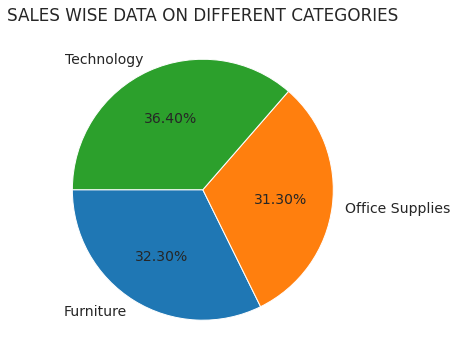

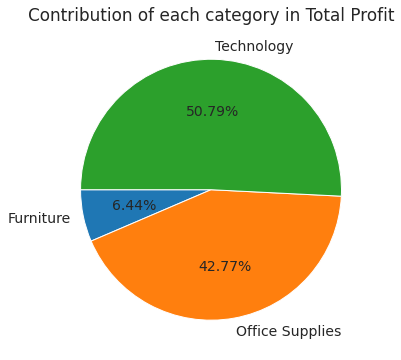

In [75]:
plt.figure(figsize=(6,6))
plt.title('SALES WISE DATA ON DIFFERENT CATEGORIES')
plt.pie(category_df.Sales, labels=category_df.index, autopct='%2.2f%%', startangle=180)
plt.figure(figsize=(6,6))
plt.title('Contribution of each category in Total Profit')
plt.pie(category_df.Profit, labels=category_df.index, autopct='%2.2f%%', startangle=180);

Total profit furniture is producing least amount of profit where as Sales in different categories are almost similar but while coming to the contribution of This is because of the loses facing in Tables and Book Cases in the sub category of Furniture.To avoid this they must be discarded from selling or increase the prices to make profit.

# 4) SUB-CATEGORY WISE DISTRIBUTION OF PROFIT

Let's compare all the three categories along with their sub-categories in a single plot side by side. A bar chart can serve our purpose.

In [64]:
Furniture_df =raw_df [raw_df ['Category'] == 'Furniture']
Furniture_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...
9962,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9964,Second Class,Corporate,United States,Newark,Delaware,East,Furniture,Furnishings,13.4000,1,0.00,6.4320
9980,Second Class,Consumer,United States,Lafayette,Louisiana,South,Furniture,Tables,85.9800,1,0.00,22.3548
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028


In [65]:
Office_Supplies_df =raw_df [raw_df ['Category'] == 'Office Supplies']
Office_Supplies_df 

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,Central,Office Supplies,Paper,35.560,7,0.0,16.7132
9984,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [66]:
Technology_df = raw_df [raw_df ['Category'] == 'Technology']
Technology_df 

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,United States,San Francisco,California,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,United States,Los Angeles,California,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,United States,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,Standard Class,Consumer,United States,Grand Rapids,Michigan,Central,Technology,Phones,97.980,2,0.0,27.4344
9986,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.6470


In [52]:
Furniture_profit_df = Furniture_df.groupby('Sub-Category')['Profit'].sum()
Office_Supplies_profit_df = Office_Supplies_df.groupby('Sub-Category')['Profit'].sum()
Technology_profit_df = Technology_df.groupby('Sub-Category')['Profit'].sum()

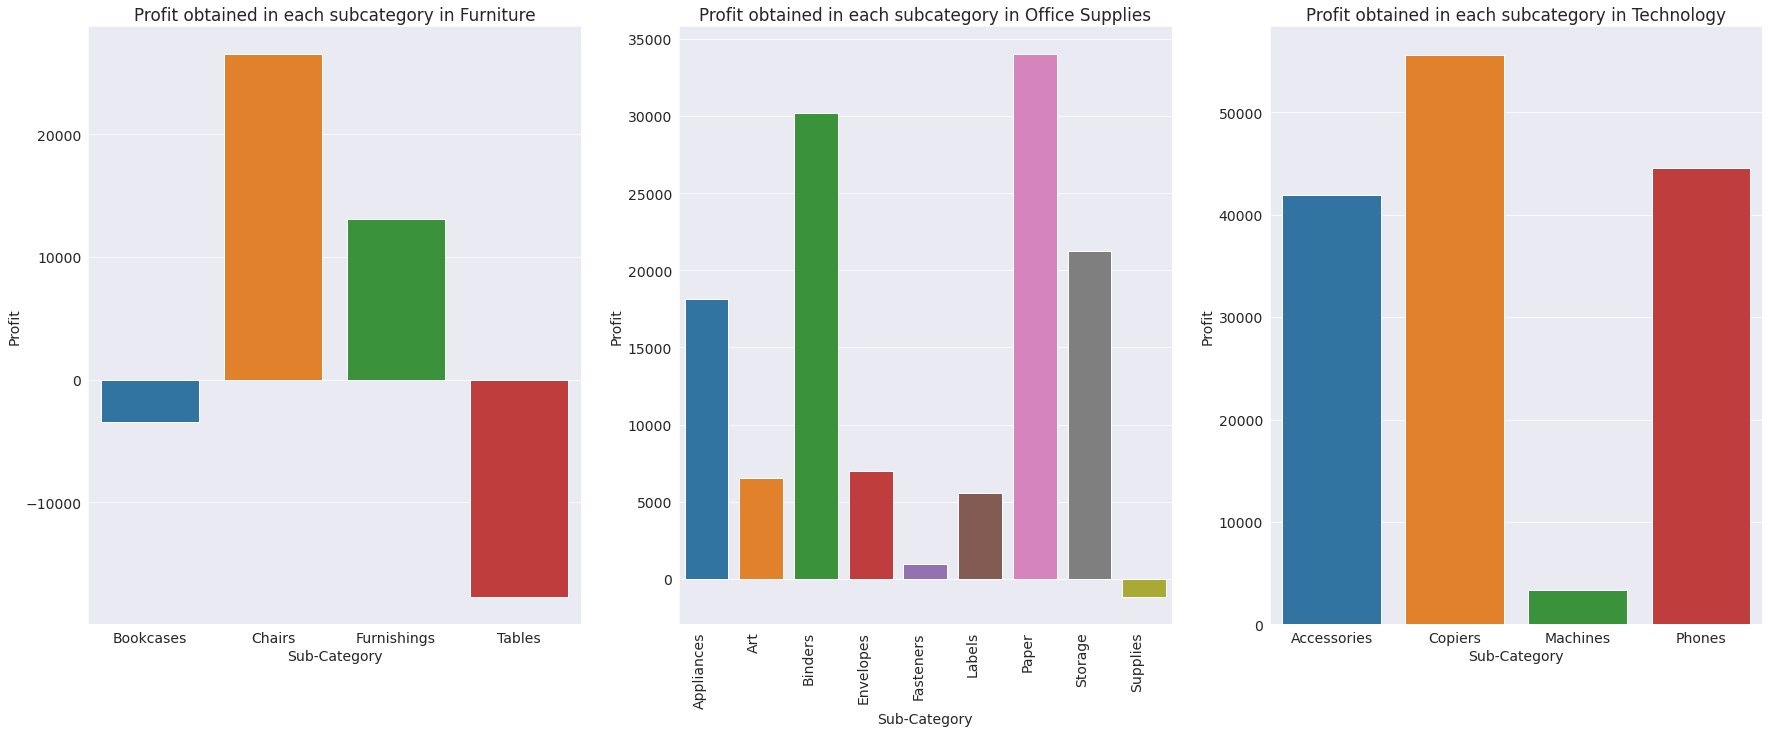

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(30, 11))

axes[0].set_title('Profit obtained in each subcategory in Furniture');
sns.barplot(x=Furniture_profit_df.index,y=Furniture_profit_df,ax=axes[0])

axes[1].set_title('Profit obtained in each subcategory in Office Supplies');
sns.barplot(x=Office_Supplies_profit_df.index,y=Office_Supplies_profit_df,ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90,ha='right');

axes[2].set_title('Profit obtained in each subcategory in Technology');
sns.barplot(x=Technology_profit_df.index,y=Technology_profit_df,ax=axes[2]);



These plots show that the maximum percentage of profits are coming from Offile supplies, while the loss is occuring majorly due to sub categories of furniture like Bookcases and Tables. Also, Technolgy is not out of the major contributing factors for profit. Infact, it is the only category where no item is sold at loss.

## Asking and answering questions

###  1) What is the profit obtained by different segments?


In [84]:
Segment_wise_profit= raw_df.groupby('Segment')['Profit'].sum()

In [79]:
Segment_wise_profit

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

From the above data,it is clearly visible that most of the profit is obtained from Consumer segment.

### 2) How many types of ship modes are there and which type is most profitable?



In [105]:
raw_df.groupby('Ship Mode')['Profit'].sum()

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

There are four types of Ship Modes are available,in which most of the profit is obtaining
from Standard Class Mode.

### 3) which states are producing loss and what are those?

In [113]:
state_wise_loss_df = state_df[state_df['Profit']<0]
state_wise_loss_df

,Sales,Profit,profit %
State,,,
Arizona,35282.0010,-3427.9246,-9.715789
Colorado,32108.1180,-6527.8579,-20.330864
Florida,89473.7080,-3399.3017,-3.799219
Illinois,80166.1010,-12607.8870,-15.727205
North Carolina,55603.1640,-7490.9122,-13.472097
Ohio,78258.1360,-16971.3766,-21.686405
Oregon,17431.1500,-1190.4705,-6.829558
Pennsylvania,116511.9140,-15559.9603,-13.354823
Tennessee,30661.8730,-5341.6936,-17.421289


In [119]:
state_wise_loss_df.index.unique()

Index(['Arizona', 'Colorado', 'Florida', 'Illinois', 'North Carolina', 'Ohio',
       'Oregon', 'Pennsylvania', 'Tennessee', 'Texas'],
      dtype='object', name='State')

These are the states which are producing losses and increasing discount,decreasing the sales price may lead to decrease some amount of loss.

## Conclusions and Inferences:

Based on our exploration, we can conclude the following results:

1) The sales of the superstore are distributed among three segments: Consumer, Corporate, Home supplies. These segments are spread over four regions: West, East, Central and South. Each of the item sold belongs to one of the categories: Furniture, Office supplies or Technology.

2) Sales and Profits are directly proportional in East and West regions,while sales in central region are greater than sales in south region but while coming in to its profit distribution,south region is producing greater profit than central region. There is a need of marketing or an improvement in shipment process for the south and central regions.

3) In Sub-Category Tables and Book Cases are facing loses,Thus, they must be discarded from selling or increase the prices to make profit.

4) Supplies is the sub category of Office supplies which is in loss and thus to be taken care of. Machines in Technology are not making the considerable profit(very less). So, they have to be improved in terms of manufacturing cost to make profits more.

5) Sales in different categories are almost similar but while coming to the contribution of total profit furniture is producing least amount of profit.This is because of the loses facing in Tables and Book Cases in the sub category of Furniture.To avoid this they must be discarded from selling or increase the prices to make profit.





#### The Problems that may arise as a business manager are:

1) Some areas(like Book cases and tables) are at huge loss, this is very challenging to bring this to profits. Also, it can not be discarded from selling, because if it is done so, the sales of other products might get affected.

2) The sales are unevenly distributed over different regions. Thus, its a challenging task to improve the sales in certain regions (whether to create faith in people over the products of their store or to make the shipping process better).

In [120]:
import jovian

In [ ]:
jovian.commit('Project=data-analysis-of-a-super-store')

<IPython.core.display.Javascript object>